# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [14]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________

50000/50000 [==============================] - 22s 448us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
50000/50000 [==============================] - 22s 442us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 19s 388us/step - loss: 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 463us/step - loss: 2.0015 - acc: 0.2828 - val_loss: 1.8869 - val_acc: 0.3328
Epoch 2/20
50000/50000 [==============================] - 22s 432us/step - loss: 1.8054 - acc: 0.3628 - val_loss: 1.7833 - val_acc: 0.3605
Epoch 3/20
50000/50000 [==============================] - 21s 410us/step - loss: 1.7318 - acc: 0.3905 - val_loss: 1.7215 - val_acc: 0.3902
Epoch 4/20
50000/50000 [==============================] - 21s 416us/step - loss: 1.6817 - acc: 0.4094 - val_loss: 1.6854 - val_acc: 0.4070
Epoch 5/20
50000/50000 [==============================] - 21s 430us/step - loss: 1.6472 - acc: 0.4232 - val_loss: 1.6506 - val_acc: 0.4122
Epoch 6/20
50000/50000 [==============================] - 22s 440us/step - loss: 1.6139 - acc: 0.4341 - val_loss: 1.6310 - val_acc: 0.4292
Epoch 7/20
50000/50000 [==============================] - 22s 446us/step - loss: 1.5918 - acc: 0.4440 - val_loss: 1.

50000/50000 [==============================] - 22s 438us/step - loss: 2.3730 - acc: 0.1234 - val_loss: 2.3696 - val_acc: 0.1258
Epoch 4/20
50000/50000 [==============================] - 21s 418us/step - loss: 2.3641 - acc: 0.1247 - val_loss: 2.3613 - val_acc: 0.1277
Epoch 5/20
50000/50000 [==============================] - 22s 430us/step - loss: 2.3562 - acc: 0.1257 - val_loss: 2.3539 - val_acc: 0.1284
Epoch 6/20
50000/50000 [==============================] - 22s 435us/step - loss: 2.3493 - acc: 0.1274 - val_loss: 2.3473 - val_acc: 0.1301
Epoch 7/20
50000/50000 [==============================] - 21s 416us/step - loss: 2.3431 - acc: 0.1284 - val_loss: 2.3414 - val_acc: 0.1316
Epoch 8/20
50000/50000 [==============================] - 21s 415us/step - loss: 2.3374 - acc: 0.1291 - val_loss: 2.3361 - val_acc: 0.1314
Epoch 9/20
50000/50000 [==============================] - 22s 432us/step - loss: 2.3324 - acc: 0.1303 - val_loss: 2.3312 - val_acc: 0.1310
Epoch 10/20
50000/50000 [=============

Epoch 5/20
50000/50000 [==============================] - 23s 452us/step - loss: 2.1506 - acc: 0.2421 - val_loss: 2.1458 - val_acc: 0.2437
Epoch 6/20
50000/50000 [==============================] - 25s 496us/step - loss: 2.1380 - acc: 0.2504 - val_loss: 2.1343 - val_acc: 0.2509
Epoch 7/20
50000/50000 [==============================] - 22s 438us/step - loss: 2.1270 - acc: 0.2563 - val_loss: 2.1240 - val_acc: 0.2579
Epoch 8/20
50000/50000 [==============================] - 22s 438us/step - loss: 2.1173 - acc: 0.2620 - val_loss: 2.1149 - val_acc: 0.2630
Epoch 9/20
50000/50000 [==============================] - 22s 438us/step - loss: 2.1087 - acc: 0.2681 - val_loss: 2.1068 - val_acc: 0.2678
Epoch 10/20
50000/50000 [==============================] - 22s 444us/step - loss: 2.1010 - acc: 0.2715 - val_loss: 2.0996 - val_acc: 0.2719
Epoch 11/20
50000/50000 [==============================] - 22s 442us/step - loss: 2.0941 - acc: 0.2757 - val_loss: 2.0930 - val_acc: 0.2759
Epoch 12/20
50000/50000 [

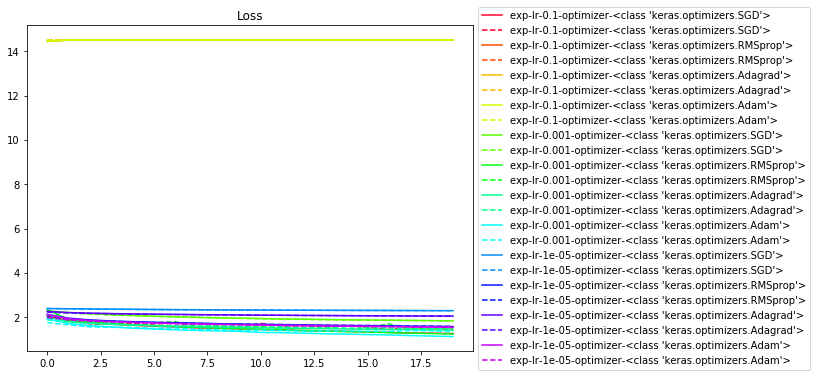

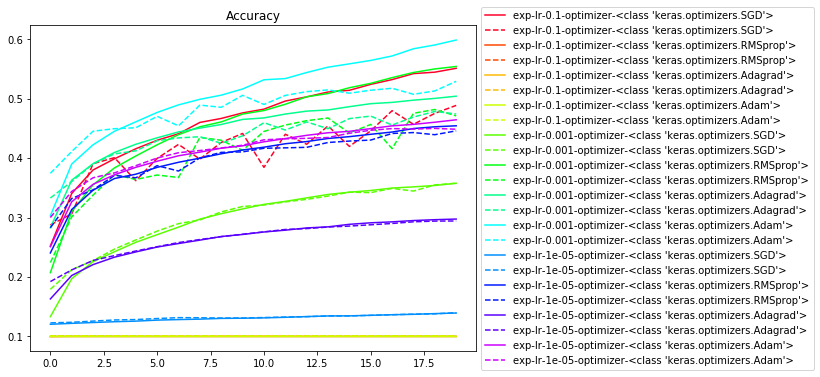

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()